In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn
from matplotlib import pyplot as plt

from stats_utils import combine_dists

In [2]:
df = pd.read_excel('../data/062018_rubisco_kinetics.xlsx', sheet_name='kinetic_data')

mask = (df.use == 1.0) & (df.mutant != 1.0)
filtered_df = df[mask]

In [3]:
grouped = filtered_df.groupby('species')
species_counts = grouped.count().identifier
species_to_consider = species_counts[species_counts > 3]
species_to_consider

species
Flaveria pringlei              5
Glycine max                    6
Manihot esculenta              4
Nicotiana tabacum              5
Rhodospirillum rubrum         13
Spinacia oleracea             20
Synechococcus sp. PCC 6301     8
Triticum aestivum              9
Name: identifier, dtype: int64

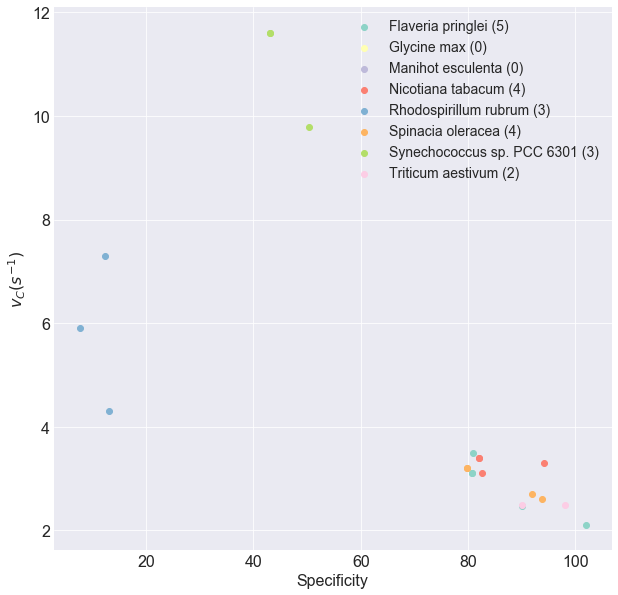

In [4]:
figure = plt.figure(figsize=(10,10))
n = species_to_consider.size
colors = seaborn.color_palette('Set3', n_colors=8)
seaborn.set_style('darkgrid')

for i, sp in enumerate(species_to_consider.index):
        
    sp_data = grouped.get_group(sp)
    mask = sp_data.S.notnull() & sp_data.vC.notnull()
    masked = sp_data[mask]
    n = mask.sum()
    
    color = colors[i % len(colors)]
    plt.scatter(masked.S, masked.vC, label='%s (%d)' % (sp, n), color=color)

plt.legend(fontsize=14)
plt.xlabel('Specificity', fontsize=16)
plt.ylabel('$v_C (s^{-1})$', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

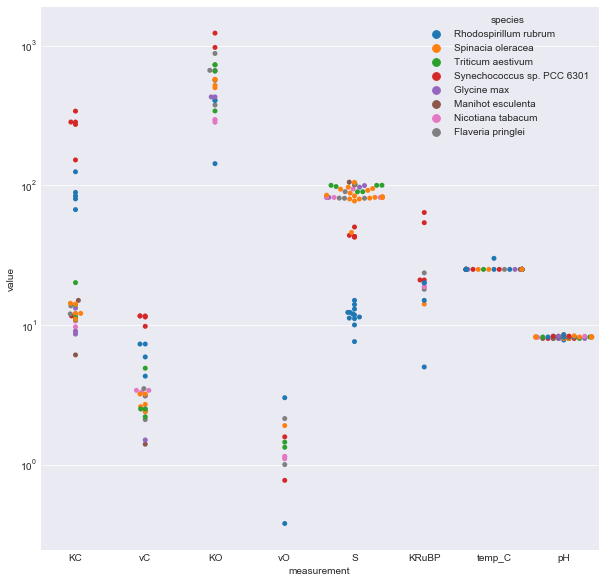

In [5]:
subset_df = filtered_df[filtered_df.species.isin(species_to_consider.index)]
cols = ['species', 'KC', 'vC', 'KO', 'vO', 'S', 'KRuBP', 'temp_C', 'pH']

melted_subset_df = pd.melt(subset_df[cols], "species", var_name="measurement")
fig = plt.figure(figsize=(10,10))
plt.yscale('log')
seaborn.swarmplot(x="measurement", y="value", hue="species", data=melted_subset_df)

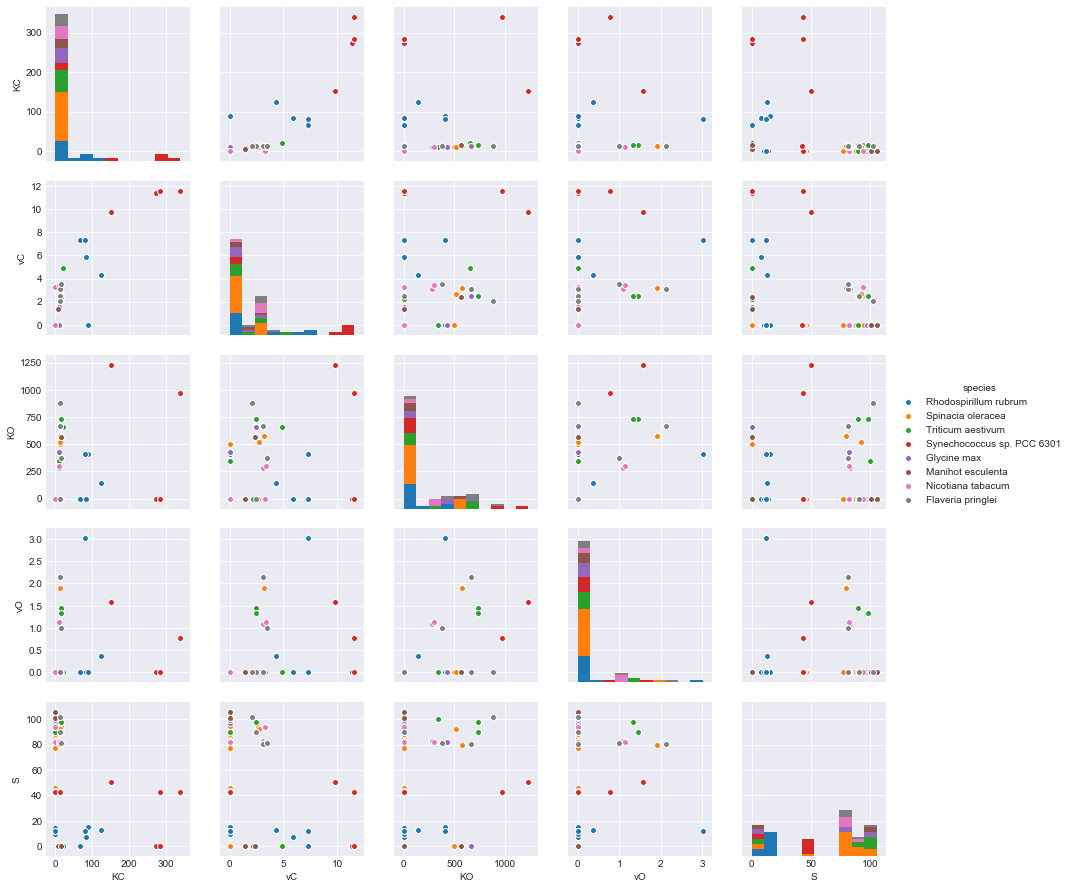

In [6]:
all_vars = ['species', 'KC', 'vC', 'KO', 'vO', 'S']
pairs_df = subset_df[all_vars].copy()
pairs_df.fillna(value=0, inplace=True)

seaborn.pairplot(pairs_df, hue="species")

In [7]:


ratio_cols = ['KC', 'vC', 'KO', 'S', 'KRuBP']

for col in ratio_cols:
    sd_col = col + '_SD'
    mask = filtered_df[col].notnull() & filtered_df[sd_col].notnull()
    masked = filtered_df[mask]
    ratio = masked[sd_col] / masked[col]
    print(col)
    print('Mean ratio:', np.mean(ratio))
    print('Median ratio:', np.median(ratio))

KC
Mean ratio: 0.08916624839130839
Median ratio: 0.07028021694214875
vC
Mean ratio: 0.05875877763532673
Median ratio: 0.04166666666666667
KO
Mean ratio: 0.13003650447009688
Median ratio: 0.10983346872461414
S
Mean ratio: 0.03214022072171337
Median ratio: 0.021574854889935383
KRuBP
Mean ratio: 0.09629020743756915
Median ratio: 0.07700448734230801


0 KC
(0.5529411764705883, 0.8274509803921568, 0.7803921568627451)
1 vC
(1.0, 1.0, 0.7019607843137254)
2 KO
(0.7450980392156863, 0.7294117647058823, 0.8549019607843137)
3 S
(0.984313725490196, 0.5019607843137255, 0.4470588235294118)
4 KRuBP
(0.5019607843137255, 0.6941176470588235, 0.8274509803921568)


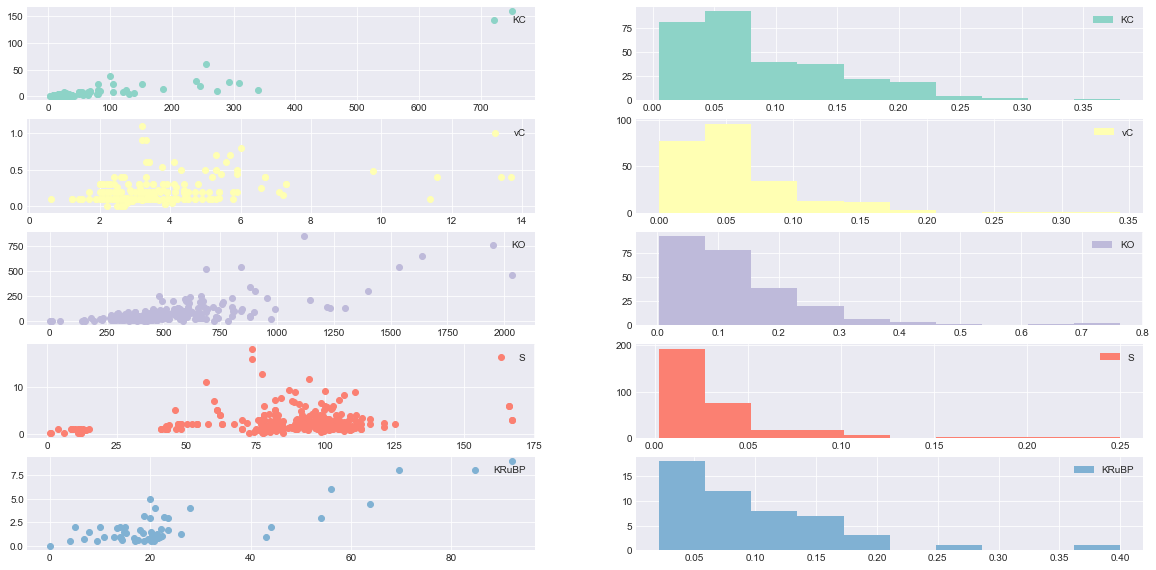

In [8]:
figure = plt.figure(figsize=(20,10))
colors = seaborn.color_palette('Set3', n_colors=8)
for i, col in enumerate(ratio_cols):
    print(i, col)
    color = colors[i]
    sd_col = col + '_SD'
    mask = filtered_df[col].notnull() & filtered_df[sd_col].notnull()
    masked = filtered_df[mask]
    plt.subplot(5, 2, 2*i + 1)
    plt.scatter(masked[col], masked[sd_col], label=col, color=color)
    plt.legend()
    
    plt.subplot(5, 2, 2*i + 2)
    ratio = masked[sd_col] / masked[col]
    plt.hist(ratio.tolist(), color=color, label=col)
    plt.legend()
    
plt.show()

In [29]:


def merge_group(name, group):
    

grouped = filtered_df.groupby(['species', 'short_ref'])



for name, group in grouped:
    if group.shape[0] > 2:
        print(group.S)
        print(group.S_SD)
        print(group.pH)
        
        mean, sd = combine_dists(group.S, group.S_SD)
        print(mean, sd)
        break

187    11.2
188    11.8
189    11.1
190    11.4
191    10.0
192    12.0
Name: S, dtype: float64
187    0.5
188    0.2
189    0.2
190    0.4
191      1
192      1
Name: S_SD, dtype: object
187    8.2
188    8.2
189    8.2
190    8.2
191    8.2
192    8.2
Name: pH, dtype: object
11.266864112051218 0.9060561045035936


In [26]:
l = [np.random.normal(11.2, 0.5, 100), np.random.normal(11.2, 0.5, 100)]
np.hstack(l)

array([11.50549891, 11.61290398, 11.04033923, 10.84134442, 10.31453245,
       11.62801456, 10.7979555 , 10.57185222, 11.02337577, 11.08472748,
       11.64907963, 11.74851766, 10.66320957, 10.37319492, 10.78843703,
       11.44165804, 12.02101803, 11.7524445 , 10.62653487, 11.53263518,
       11.22206502, 10.96527785, 10.64551436, 11.38910045, 12.49722053,
       11.24481379, 10.90444874, 12.71895022, 11.90569889, 11.30614534,
       10.83304862, 10.90568996, 11.17027588, 10.95971892, 12.13246921,
       11.29256634, 10.7449372 , 11.90899437, 10.53756889, 11.57238555,
       11.33518502, 11.05747491, 11.37394967, 10.67194422, 11.76410582,
       11.43103679, 11.33286914, 11.45191254, 11.16033064, 10.96143406,
       10.86484444, 11.3754929 , 11.00112362, 10.43457863, 11.84479774,
       11.30753407, 11.01464283, 11.75825504, 11.0005601 , 10.88604386,
       10.72327866, 11.29603111, 10.92666131, 10.19416241, 11.93704845,
       11.73067727, 11.87742296, 10.81474944, 11.81791859, 11.44